In [1]:
import torch.nn as nn
import torch
from torch_geometric.data import DataLoader

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
from recommend_with_GNN import make_dataset, GNN_model
from global_settings import *

def test_with_route_data(graph_list, data_time, model_name):
    model_path = os.path.join(GNN_MODEL_PATH, data_time, model_name)
    model = torch.load(model_path)
    data = graph_list[0]
    output = model(data)
    print(f"pred:{output.max(dim=1)[1]}, real:{data.y}")
    test_loader = DataLoader(graph_list, batch_size = 64, shuffle=True)
    
    criterion = nn.CrossEntropyLoss()
    test_acc, test_loss, data_y, pred_y = GNN_model.test_with_data(model, test_loader, criterion)
    print(f'Test_loss: {test_loss:.4f}, Test_acc:{test_acc:.4f}')
    
    draw_confusion_matrix(data_y, pred_y, ["Normal", "Recommended"],pdf_save_path="test.png")
    
def draw_confusion_matrix(label_true, label_pred, label_name, title="Confusion Matrix", pdf_save_path=None, dpi=1000):
    cm = confusion_matrix(y_true=label_true, y_pred=label_pred, normalize=None)
    print(cm)
    
    f1_macro = f1_score(y_true=label_true, y_pred=label_pred,average=None)
    f1_micro = f1_score(y_true=label_true, y_pred=label_pred,labels=[0,1], average='micro')
    print(f"f1_value: {f1_macro}")
    print(f"f1_micro: {f1_micro}")
    
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, cmap='Blues')
    plt.title(title)
    plt.xlabel("Predict label")
    plt.ylabel("Truth label")
    plt.yticks(range(label_name.__len__()), label_name,fontsize=8)
    plt.xticks(range(label_name.__len__()), label_name, rotation=0,fontsize=8)
    plt.tight_layout()
    plt.colorbar()
    for i in range(label_name.__len__()):
        for j in range(label_name.__len__()):
            color = (1, 1, 1) if i == j else (0, 0, 0) 
            # value = float(format('%.2f' % cm[j, i]))
            value = int(format('%d' % cm[j, i]))
            plt.text(i, j, value, verticalalignment='center', horizontalalignment='center', color=color, fontsize=12)
    if not pdf_save_path is None:
        plt.savefig(pdf_save_path, bbox_inches='tight', dpi=dpi)

(2473694, 4)
(2319146, 4)
                                  as_path  path_len     rov_mask  has_rov
0                        57344,1299,59793         3        1,1,0        2
1              34927,60011,3356,174,25673         5    0,0,1,1,0        2
2     49544,4637,1221,64098,138466,135106         6  1,1,0,0,0,0        2
3                  267613,174,32440,10349         4      0,1,0,0        1
4                        49544,5650,18439         3        1,0,0        1
...                                   ...       ...          ...      ...
9995              267613,1299,60610,59897         4      0,1,0,0        1
9996    27678,7004,12956,6453,9930,138663         6  0,1,0,0,0,0        1
9997             199524,1299,17378,395204         4      0,1,0,0        1
9998                58511,3257,6461,10372         4      1,1,1,0        3
9999               52320,8866,34295,48747         4      1,0,0,0        1

[10000 rows x 4 columns]


100%|██████████| 10000/10000 [00:13<00:00, 766.05it/s]
/tmp/ipykernel_19801/1990013691.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)
/ho

[Data(x=[3, 512], edge_index=[2, 7], y=[3]), Data(x=[5, 512], edge_index=[2, 13], y=[5]), Data(x=[6, 512], edge_index=[2, 16], y=[6]), Data(x=[4, 512], edge_index=[2, 10], y=[4]), Data(x=[3, 512], edge_index=[2, 7], y=[3]), Data(x=[4, 512], edge_index=[2, 10], y=[4]), Data(x=[4, 512], edge_index=[2, 10], y=[4]), Data(x=[5, 512], edge_index=[2, 13], y=[5]), Data(x=[5, 512], edge_index=[2, 13], y=[5]), Data(x=[4, 512], edge_index=[2, 10], y=[4])]
pred:tensor([0, 1, 0]), real:tensor([1, 1, 0])
Test_loss: 0.9958, Test_acc:0.8642
[[26492  1814]
 [ 4286 12319]]
f1_value: [0.89675716 0.80154857]
f1_micro: 0.8641758143884571


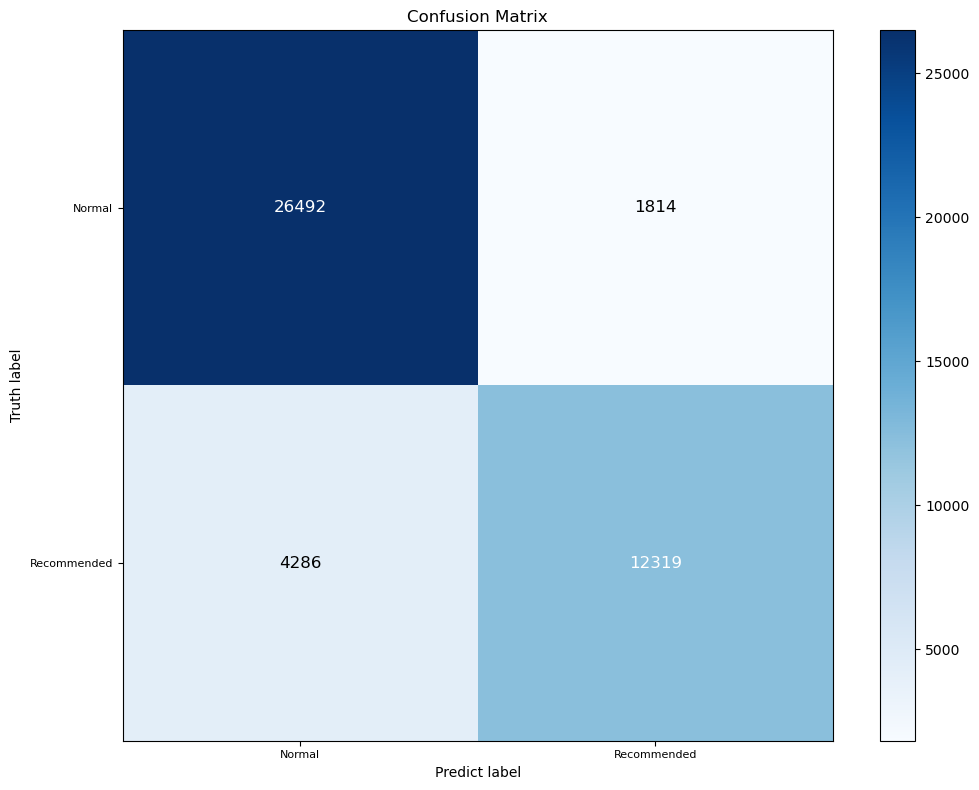

In [3]:
data_time = "20240701" # YYYYMMDD
dataset_size = 10000  # int
model_name = "18_model.pth"  # models in folder `gnn_model`
prefix_dataset = "168.167.71.0/24"  # prefix

graph_list = make_dataset.make_GNN_dataset(data_time, dataset_size, prefix_dataset)
test_with_route_data(graph_list, data_time, model_name)